In [1]:
import tensorflow as tf
import numpy as np

In [2]:
print(tf.__version__)

2.3.0-rc2


## Random Number Generation
    1. Uniform Distribution
    2. Normal Distribution
    
    - It is often used to initialize Xavier initialization or He initialization to uniform distribution and normal distribution.

### 1. Uniform Distribution

In [27]:
#tf.random.uniform([Array Form], Min/Max, Min/Max)
rand = tf.random.uniform([3], 0,1)
print(rand, end='\n\n')

rand = tf.random.uniform([2, 2], 7, 6)
print(rand)

tf.Tensor([0.559607   0.7199688  0.54677033], shape=(3,), dtype=float32)

tf.Tensor(
[[6.7494    6.8478413]
 [6.6953325 6.144216 ]], shape=(2, 2), dtype=float32)


### 2. Normal Distribution

In [25]:
#tf.random.normal([Array Form], Mean, stdev)
#ex)
rand = tf.random.normal([3], 0,1)
print(rand, end='\n\n')

rand = tf.random.normal([2, 2], 7,0.01)
print(rand)

tf.Tensor([ 0.16978043 -0.31404006  1.0518095 ], shape=(3,), dtype=float32)

tf.Tensor(
[[7.0097485 6.992703 ]
 [6.986709  6.9992127]], shape=(2, 2), dtype=float32)


# Generating Neurons

## 1. Activation Funtion(Sigmoid)
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1920px-Logistic-curve.svg.png" alt="drawing" width="300"/>
source : https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1920px-Logistic-curve.svg.png

In [28]:
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [46]:
for i in range(-7,7):
    output = sigmoid(i)
    print(i, ":", round(output, 5))

-7 : 0.00091
-6 : 0.00247
-5 : 0.00669
-4 : 0.01799
-3 : 0.04743
-2 : 0.1192
-1 : 0.26894
0 : 0.5
1 : 0.73106
2 : 0.8808
3 : 0.95257
4 : 0.98201
5 : 0.99331
6 : 0.99753


## 2. Learning Nuerons using gradient descent
<hr>
<h4>gradient descent</h4>
<img src="https://cdn-images-1.medium.com/max/600/1*iNPHcCxIvcm7RwkRaMTx1g.jpeg" alt="drawing" width="300"/>
<img src="https://miro.medium.com/max/741/1*UkIjo17ovvd4deEEt-KgWA.png" alt="drawing" width="300"/>
<h4>Mean Squiared Error</h4>
<img src="https://www.oreilly.com/library/view/mastering-tensorflow-1x/9781788292061/assets/7d7ddfc3-4bef-4f9b-986e-cdade675cf82.png" alt="drawing" width="300"/>
<hr>
source : https://www.oreilly.com/library/view/mastering-tensorflow-1x/9781788292061/1c0264af-ba5c-43d3-bb24-ba18d489dd39.xhtml<hr>
source : https://medium.com/@peteryun/ml-%EB%AA%A8%EB%91%90%EB%A5%BC-%EC%9C%84%ED%95%9C-tensorflow-3-gradient-descent-algorithm-%EA%B8%B0%EB%B3%B8-c0688208fc59<hr>
source : https://mc.ai/an-introduction-to-gradient-descent-2/

### 2-1. Without bias, Learning Weight

In [89]:
inputValue = 0.1
target = 1
weigth = tf.random.normal([1], 0, 1)

print("Repetition \t Error \t Output")

for i in range(10000):
    output = sigmoid(inputValue*weigth)
    error_ = (target - output)**2
    weigth = weigth + inputValue*0.1*error_

    if( i % 1000 == 0):
        print(i, "\t:", round(error_, 6), "\t", round(output,6))

Repetition 	 Error 	 Output
0 	: 0.246588 	 0.503424
1000 	: 0.195344 	 0.558022
2000 	: 0.159238 	 0.600954
3000 	: 0.133023 	 0.635277
4000 	: 0.113417 	 0.663225
5000 	: 0.098353 	 0.686387
6000 	: 0.086503 	 0.705886
7000 	: 0.076987 	 0.722535
8000 	: 0.069208 	 0.736925
9000 	: 0.062751 	 0.749498


### 2-2. using bias, Learning Weight

In [91]:
inputValue = 0.1
target = 1
weigth = tf.random.normal([1], 0, 1)
bias   = tf.random.normal([1], 0, 1)

print("Repetition \t Error \t Output")

for i in range(1000):
    output = sigmoid(inputValue*weigth + bias)
    error_ = (target - output)**2
    weigth = weigth + inputValue*0.1*error_
    bias   = bias   + 1 * 0.1 * error_

    if( i % 100 == 0):
        print(i, "\t:", round(error_, 6), "\t", round(output,6))

Repetition 	 Error 	 Output
0 	: 0.055851 	 0.763671
100 	: 0.029293 	 0.828849
200 	: 0.019507 	 0.860333
300 	: 0.014519 	 0.879506
400 	: 0.01152 	 0.892667
500 	: 0.009528 	 0.902389
600 	: 0.008112 	 0.909934
700 	: 0.007055 	 0.916003
800 	: 0.006238 	 0.921017
900 	: 0.005588 	 0.925248


## 3.  Learning Weight for Solving AND Problem and OR Problem
<img src="https://t1.daumcdn.net/cfile/tistory/231E9B4455961D0616" alt="drawing" width="500"/><hr>
<img src="https://simonjisu.github.io/assets/ML/perceptron/perceptron_2.png" alt="drawing" width="800"/><hr>

source : https://simonjisu.github.io/numpyseries/2017/12/07/numpywithnn_1.html<hr>
source : https://thrillfighter.tistory.com/265<hr>

### 3-1) AND Problem

In [125]:
import numpy as np

In [169]:
#initialize (AND Problem)
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[1],[0],[0],[0]])

weight_ = tf.random.normal([2],0,1)
bias_ = tf.random.normal([1], 0,1)

In [159]:
for i in range(3001):
    error_sum = 0
    
    for j in range(len(x)):
        output = sigmoid(np.sum(x[j]*weight_)+bias_)
        error = y[j][0] - output
        weight_ = weight_ + 0.1*x[j]*error
        bias_   = bias_+0.1*error
        
        #total error
        error_sum += error
        
    if (i % 300 == 0):
        print(i, ":", round(error_sum,6))

0 : -2.206629
300 : -0.084117
600 : -0.047253
900 : -0.032669
1200 : -0.024887
1500 : -0.020067
1800 : -0.016793
2100 : -0.014432
2400 : -0.012645
2700 : -0.011251
3000 : -0.01013


In [160]:
for i in range(len(x)):
    print('X :', x[i], 'Y : ', y[i], 'Output : ', round(sigmoid(np.sum(x[i]*weight_)+bias_),1))

X : [1 1] Y :  [1] Output :  1.0
X : [1 0] Y :  [0] Output :  0.0
X : [0 1] Y :  [0] Output :  0.0
X : [0 0] Y :  [0] Output :  0.0


### 3-2) OR Problem

In [161]:
#initialize (OR Problem)
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[1],[1],[1],[0]])

weight_ = tf.random.normal([2],0,1)
bias_ = tf.random.normal([1], 0,1)

In [162]:
for i in range(3001):
    error_sum = 0
    
    for j in range(len(x)):
        output = sigmoid(np.sum(x[j]*weight_)+bias_)
        error = y[j][0] - output
        weight_ = weight_ + 0.1*x[j]*error
        bias_   = bias_+0.1*error
        
        #total error
        error_sum += error
        
    if (i % 300 == 0):
        print(i, ":", round(error_sum,6))

0 : 1.288315
300 : -0.03301
600 : -0.017066
900 : -0.011447
1200 : -0.008588
1500 : -0.006863
1800 : -0.005712
2100 : -0.004888
2400 : -0.004271
2700 : -0.003792
3000 : -0.003408


In [163]:
for i in range(len(x)):
    print('X :', x[i], 'Y : ', y[i], 'Output : ', round(sigmoid(np.sum(x[i]*weight_)+bias_), 1))

X : [1 1] Y :  [1] Output :  1.0
X : [1 0] Y :  [1] Output :  1.0
X : [0 1] Y :  [1] Output :  1.0
X : [0 0] Y :  [0] Output :  0.0


### 3-3) XOR Problem
#### -A single Vector can't solve this problem
<img src="https://simonjisu.github.io/assets/ML/perceptron/perceptron_3.png" alt="drawing" width="300"/><hr>
<img src="https://mblogthumb-phinf.pstatic.net/MjAxOTA4MTdfMTk5/MDAxNTY2MDAzNjg4MTE3.9y3O_1k4p8-zUeEP7sN_WYWkIB4rElVMl8isWkFZAN8g.8tblY85F4FGg3YjYZrSvKendg4882tkB4Z3vg4sPmRwg.PNG.cni1577/%EC%BA%A1%EC%B2%98.PNG?type=w800" alt="drawing" width="300"/><hr>

source : https://simonjisu.github.io/numpyseries/2017/12/07/numpywithnn_1.html<hr>
source : https://m.blog.naver.com/PostView.nhn?blogId=cni1577&logNo=221619153912&proxyReferer=https:%2F%2Fwww.google.com%2F<hr>


In [164]:
#initialize (XOR Problem)
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[0],[1],[1],[0]])

weight_ = tf.random.normal([2],0,1)
bias_ = tf.random.normal([1], 0,1)

In [165]:
for i in range(3001):
    error_sum = 0
    
    for j in range(len(x)):
        output = sigmoid(np.sum(x[j]*weight_)+bias_)
        error = y[j][0] - output
        weight_ = weight_ + 0.1*x[j]*error
        bias_   = bias_+0.1*error
        
        #total error
        error_sum += error
        
    if (i % 300 == 0):
        print(i, ":", round(error_sum,6))

0 : 0.183885
300 : -0.001086
600 : -9e-06
900 : -0.0
1200 : 0.0
1500 : 0.0
1800 : 0.0
2100 : 0.0
2400 : 0.0
2700 : 0.0
3000 : 0.0


In [167]:
for i in range(len(x)):
    print('X :', x[i], 'Y : ', y[i], 'Output : ', round(sigmoid(np.sum(x[i]*weight_)+bias_), 1))

X : [1 1] Y :  [0] Output :  0.5
X : [1 0] Y :  [1] Output :  0.5
X : [0 1] Y :  [1] Output :  0.5
X : [0 0] Y :  [0] Output :  0.5


### 3-4) Making model for XOR using Keras
<hr>
<h5>-We are going to use "tf.Keras.Sequential" function</h5>
<h5>-There have two vector in Keras model</h5>

In [3]:
import numpy as np

In [4]:
#initialize (XOR Problem)
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[0],[1],[1],[0]])

In [5]:
#making model

# /***It is structure that combines neurons in a row***/  # 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation = "sigmoid", input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation = "sigmoid")
])

In [6]:
#setting model

# /*** choosing optimizer & loss function  ***/
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

In [7]:
#Checking model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 9         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(x, y, epochs=2000, batch_size = 1, use_multiprocessing = True)

Epoch 1/2000
4/4 [==============================] - 0s 740us/step - loss: 0.2795
Epoch 2/2000
4/4 [==============================] - 0s 531us/step - loss: 0.2761
Epoch 3/2000
4/4 [==============================] - 0s 681us/step - loss: 0.2731
Epoch 4/2000
4/4 [==============================] - 0s 541us/step - loss: 0.2705
Epoch 5/2000
4/4 [==============================] - 0s 651us/step - loss: 0.2680
Epoch 6/2000
4/4 [==============================] - 0s 573us/step - loss: 0.2660
Epoch 7/2000
4/4 [==============================] - 0s 512us/step - loss: 0.2643
Epoch 8/2000
4/4 [==============================] - 0s 631us/step - loss: 0.2627
Epoch 9/2000
4/4 [==============================] - 0s 632us/step - loss: 0.2615
Epoch 10/2000
4/4 [==============================] - 0s 564us/step - loss: 0.2604
Epoch 11/2000
4/4 [==============================] - 0s 519us/step - loss: 0.2596
Epoch 12/2000
4/4 [==============================] - 0s 623us/step - loss: 0.2587
Epoch 13/2000
4/4 [======

4/4 [==============================] - 0s 536us/step - loss: 0.2513
Epoch 101/2000
4/4 [==============================] - 0s 578us/step - loss: 0.2512
Epoch 102/2000
4/4 [==============================] - 0s 557us/step - loss: 0.2513
Epoch 103/2000
4/4 [==============================] - 0s 530us/step - loss: 0.2511
Epoch 104/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2511
Epoch 105/2000
4/4 [==============================] - 0s 626us/step - loss: 0.2512
Epoch 106/2000
4/4 [==============================] - 0s 618us/step - loss: 0.2511
Epoch 107/2000
4/4 [==============================] - 0s 543us/step - loss: 0.2511
Epoch 108/2000
4/4 [==============================] - 0s 637us/step - loss: 0.2511
Epoch 109/2000
4/4 [==============================] - 0s 560us/step - loss: 0.2510
Epoch 110/2000
4/4 [==============================] - 0s 739us/step - loss: 0.2510
Epoch 111/2000
4/4 [==============================] - 0s 484us/step - loss: 0.2510
Epoch 112/2000
4/4 

4/4 [==============================] - 0s 760us/step - loss: 0.2471
Epoch 199/2000
4/4 [==============================] - 0s 657us/step - loss: 0.2472
Epoch 200/2000
4/4 [==============================] - 0s 537us/step - loss: 0.2472
Epoch 201/2000
4/4 [==============================] - 0s 575us/step - loss: 0.2470
Epoch 202/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2470
Epoch 203/2000
4/4 [==============================] - 0s 598us/step - loss: 0.2469
Epoch 204/2000
4/4 [==============================] - 0s 690us/step - loss: 0.2469
Epoch 205/2000
4/4 [==============================] - 0s 511us/step - loss: 0.2469
Epoch 206/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2468
Epoch 207/2000
4/4 [==============================] - 0s 543us/step - loss: 0.2467
Epoch 208/2000
4/4 [==============================] - 0s 552us/step - loss: 0.2467
Epoch 209/2000
4/4 [==============================] - 0s 606us/step - loss: 0.2466
Epoch 210/2000
4/4 

4/4 [==============================] - 0s 548us/step - loss: 0.2410
Epoch 297/2000
4/4 [==============================] - 0s 510us/step - loss: 0.2410
Epoch 298/2000
4/4 [==============================] - 0s 591us/step - loss: 0.2410
Epoch 299/2000
4/4 [==============================] - 0s 661us/step - loss: 0.2409
Epoch 300/2000
4/4 [==============================] - 0s 472us/step - loss: 0.2408
Epoch 301/2000
4/4 [==============================] - 0s 642us/step - loss: 0.2408
Epoch 302/2000
4/4 [==============================] - 0s 682us/step - loss: 0.2407
Epoch 303/2000
4/4 [==============================] - 0s 500us/step - loss: 0.2406
Epoch 304/2000
4/4 [==============================] - 0s 655us/step - loss: 0.2404
Epoch 305/2000
4/4 [==============================] - 0s 572us/step - loss: 0.2404
Epoch 306/2000
4/4 [==============================] - 0s 662us/step - loss: 0.2403
Epoch 307/2000
4/4 [==============================] - 0s 566us/step - loss: 0.2403
Epoch 308/2000
4/4 

4/4 [==============================] - 0s 508us/step - loss: 0.2325
Epoch 395/2000
4/4 [==============================] - 0s 540us/step - loss: 0.2323
Epoch 396/2000
4/4 [==============================] - 0s 601us/step - loss: 0.2323
Epoch 397/2000
4/4 [==============================] - 0s 434us/step - loss: 0.2321
Epoch 398/2000
4/4 [==============================] - 0s 560us/step - loss: 0.2321
Epoch 399/2000
4/4 [==============================] - 0s 636us/step - loss: 0.2319
Epoch 400/2000
4/4 [==============================] - 0s 671us/step - loss: 0.2318
Epoch 401/2000
4/4 [==============================] - 0s 527us/step - loss: 0.2318
Epoch 402/2000
4/4 [==============================] - 0s 628us/step - loss: 0.2317
Epoch 403/2000
4/4 [==============================] - 0s 705us/step - loss: 0.2315
Epoch 404/2000
4/4 [==============================] - 0s 500us/step - loss: 0.2314
Epoch 405/2000
4/4 [==============================] - 0s 495us/step - loss: 0.2313
Epoch 406/2000
4/4 

4/4 [==============================] - 0s 565us/step - loss: 0.2211
Epoch 493/2000
4/4 [==============================] - 0s 497us/step - loss: 0.2210
Epoch 494/2000
4/4 [==============================] - 0s 515us/step - loss: 0.2208
Epoch 495/2000
4/4 [==============================] - 0s 554us/step - loss: 0.2207
Epoch 496/2000
4/4 [==============================] - 0s 643us/step - loss: 0.2206
Epoch 497/2000
4/4 [==============================] - 0s 548us/step - loss: 0.2205
Epoch 498/2000
4/4 [==============================] - 0s 513us/step - loss: 0.2203
Epoch 499/2000
4/4 [==============================] - 0s 599us/step - loss: 0.2202
Epoch 500/2000
4/4 [==============================] - 0s 658us/step - loss: 0.2201
Epoch 501/2000
4/4 [==============================] - 0s 436us/step - loss: 0.2199
Epoch 502/2000
4/4 [==============================] - 0s 578us/step - loss: 0.2197
Epoch 503/2000
4/4 [==============================] - 0s 587us/step - loss: 0.2197
Epoch 504/2000
4/4 

4/4 [==============================] - 0s 586us/step - loss: 0.2076
Epoch 591/2000
4/4 [==============================] - 0s 460us/step - loss: 0.2075
Epoch 592/2000
4/4 [==============================] - 0s 822us/step - loss: 0.2073
Epoch 593/2000
4/4 [==============================] - 0s 584us/step - loss: 0.2071
Epoch 594/2000
4/4 [==============================] - 0s 499us/step - loss: 0.2069
Epoch 595/2000
4/4 [==============================] - 0s 709us/step - loss: 0.2068
Epoch 596/2000
4/4 [==============================] - 0s 734us/step - loss: 0.2067
Epoch 597/2000
4/4 [==============================] - 0s 760us/step - loss: 0.2066
Epoch 598/2000
4/4 [==============================] - 0s 881us/step - loss: 0.2064
Epoch 599/2000
4/4 [==============================] - 0s 604us/step - loss: 0.2063
Epoch 600/2000
4/4 [==============================] - 0s 827us/step - loss: 0.2062
Epoch 601/2000
4/4 [==============================] - 0s 682us/step - loss: 0.2060
Epoch 602/2000
4/4 

4/4 [==============================] - 0s 497us/step - loss: 0.1930
Epoch 689/2000
4/4 [==============================] - 0s 660us/step - loss: 0.1927
Epoch 690/2000
4/4 [==============================] - 0s 666us/step - loss: 0.1927
Epoch 691/2000
4/4 [==============================] - 0s 561us/step - loss: 0.1925
Epoch 692/2000
4/4 [==============================] - 0s 541us/step - loss: 0.1923
Epoch 693/2000
4/4 [==============================] - 0s 612us/step - loss: 0.1922
Epoch 694/2000
4/4 [==============================] - 0s 558us/step - loss: 0.1920
Epoch 695/2000
4/4 [==============================] - 0s 581us/step - loss: 0.1919
Epoch 696/2000
4/4 [==============================] - 0s 612us/step - loss: 0.1918
Epoch 697/2000
4/4 [==============================] - 0s 748us/step - loss: 0.1916
Epoch 698/2000
4/4 [==============================] - 0s 607us/step - loss: 0.1914
Epoch 699/2000
4/4 [==============================] - 0s 480us/step - loss: 0.1913
Epoch 700/2000
4/4 

4/4 [==============================] - 0s 508us/step - loss: 0.1774
Epoch 787/2000
4/4 [==============================] - 0s 445us/step - loss: 0.1773
Epoch 788/2000
4/4 [==============================] - 0s 484us/step - loss: 0.1771
Epoch 789/2000
4/4 [==============================] - 0s 620us/step - loss: 0.1770
Epoch 790/2000
4/4 [==============================] - 0s 499us/step - loss: 0.1768
Epoch 791/2000
4/4 [==============================] - 0s 539us/step - loss: 0.1766
Epoch 792/2000
4/4 [==============================] - 0s 433us/step - loss: 0.1764
Epoch 793/2000
4/4 [==============================] - 0s 538us/step - loss: 0.1763
Epoch 794/2000
4/4 [==============================] - 0s 493us/step - loss: 0.1762
Epoch 795/2000
4/4 [==============================] - 0s 516us/step - loss: 0.1760
Epoch 796/2000
4/4 [==============================] - 0s 603us/step - loss: 0.1758
Epoch 797/2000
4/4 [==============================] - 0s 671us/step - loss: 0.1756
Epoch 798/2000
4/4 

4/4 [==============================] - 0s 639us/step - loss: 0.1601
Epoch 885/2000
4/4 [==============================] - 0s 523us/step - loss: 0.1599
Epoch 886/2000
4/4 [==============================] - 0s 434us/step - loss: 0.1598
Epoch 887/2000
4/4 [==============================] - 0s 590us/step - loss: 0.1596
Epoch 888/2000
4/4 [==============================] - 0s 323us/step - loss: 0.1594
Epoch 889/2000
4/4 [==============================] - 0s 482us/step - loss: 0.1591
Epoch 890/2000
4/4 [==============================] - 0s 434us/step - loss: 0.1589
Epoch 891/2000
4/4 [==============================] - 0s 605us/step - loss: 0.1587
Epoch 892/2000
4/4 [==============================] - 0s 514us/step - loss: 0.1586
Epoch 893/2000
4/4 [==============================] - ETA: 0s - loss: 0.285 - 0s 614us/step - loss: 0.1584
Epoch 894/2000
4/4 [==============================] - 0s 523us/step - loss: 0.1583
Epoch 895/2000
4/4 [==============================] - 0s 673us/step - loss: 0.

4/4 [==============================] - 0s 572us/step - loss: 0.1397
Epoch 983/2000
4/4 [==============================] - 0s 526us/step - loss: 0.1394
Epoch 984/2000
4/4 [==============================] - 0s 565us/step - loss: 0.1392
Epoch 985/2000
4/4 [==============================] - 0s 572us/step - loss: 0.1390
Epoch 986/2000
4/4 [==============================] - 0s 536us/step - loss: 0.1389
Epoch 987/2000
4/4 [==============================] - 0s 935us/step - loss: 0.1386
Epoch 988/2000
4/4 [==============================] - 0s 748us/step - loss: 0.1383
Epoch 989/2000
4/4 [==============================] - 0s 475us/step - loss: 0.1381
Epoch 990/2000
4/4 [==============================] - 0s 578us/step - loss: 0.1379
Epoch 991/2000
4/4 [==============================] - 0s 602us/step - loss: 0.1377
Epoch 992/2000
4/4 [==============================] - 0s 533us/step - loss: 0.1375
Epoch 993/2000
4/4 [==============================] - 0s 541us/step - loss: 0.1372
Epoch 994/2000
4/4 

Epoch 1080/2000
4/4 [==============================] - 0s 748us/step - loss: 0.1161
Epoch 1081/2000
4/4 [==============================] - 0s 577us/step - loss: 0.1159
Epoch 1082/2000
4/4 [==============================] - 0s 744us/step - loss: 0.1156
Epoch 1083/2000
4/4 [==============================] - 0s 473us/step - loss: 0.1154
Epoch 1084/2000
4/4 [==============================] - 0s 454us/step - loss: 0.1151
Epoch 1085/2000
4/4 [==============================] - 0s 602us/step - loss: 0.1149
Epoch 1086/2000
4/4 [==============================] - 0s 627us/step - loss: 0.1146
Epoch 1087/2000
4/4 [==============================] - 0s 560us/step - loss: 0.1144
Epoch 1088/2000
4/4 [==============================] - 0s 555us/step - loss: 0.1141
Epoch 1089/2000
4/4 [==============================] - 0s 584us/step - loss: 0.1139
Epoch 1090/2000
4/4 [==============================] - 0s 748us/step - loss: 0.1136
Epoch 1091/2000
4/4 [==============================] - 0s 635us/step - loss:

4/4 [==============================] - 0s 499us/step - loss: 0.0920
Epoch 1178/2000
4/4 [==============================] - 0s 687us/step - loss: 0.0917
Epoch 1179/2000
4/4 [==============================] - 0s 568us/step - loss: 0.0914
Epoch 1180/2000
4/4 [==============================] - 0s 592us/step - loss: 0.0912
Epoch 1181/2000
4/4 [==============================] - 0s 646us/step - loss: 0.0910
Epoch 1182/2000
4/4 [==============================] - 0s 748us/step - loss: 0.0908
Epoch 1183/2000
4/4 [==============================] - 0s 876us/step - loss: 0.0905
Epoch 1184/2000
4/4 [==============================] - 0s 666us/step - loss: 0.0903
Epoch 1185/2000
4/4 [==============================] - 0s 759us/step - loss: 0.0901
Epoch 1186/2000
4/4 [==============================] - 0s 610us/step - loss: 0.0897
Epoch 1187/2000
4/4 [==============================] - 0s 620us/step - loss: 0.0895
Epoch 1188/2000
4/4 [==============================] - 0s 628us/step - loss: 0.0894
Epoch 11

4/4 [==============================] - 0s 602us/step - loss: 0.0703
Epoch 1275/2000
4/4 [==============================] - 0s 590us/step - loss: 0.0702
Epoch 1276/2000
4/4 [==============================] - 0s 664us/step - loss: 0.0700
Epoch 1277/2000
4/4 [==============================] - 0s 538us/step - loss: 0.0697
Epoch 1278/2000
4/4 [==============================] - 0s 571us/step - loss: 0.0695
Epoch 1279/2000
4/4 [==============================] - 0s 573us/step - loss: 0.0694
Epoch 1280/2000
4/4 [==============================] - 0s 546us/step - loss: 0.0692
Epoch 1281/2000
4/4 [==============================] - 0s 734us/step - loss: 0.0689
Epoch 1282/2000
4/4 [==============================] - 0s 534us/step - loss: 0.0688
Epoch 1283/2000
4/4 [==============================] - 0s 487us/step - loss: 0.0686
Epoch 1284/2000
4/4 [==============================] - 0s 565us/step - loss: 0.0684
Epoch 1285/2000
4/4 [==============================] - 0s 481us/step - loss: 0.0682
Epoch 12

4/4 [==============================] - 0s 741us/step - loss: 0.0534
Epoch 1372/2000
4/4 [==============================] - 0s 499us/step - loss: 0.0532
Epoch 1373/2000
4/4 [==============================] - 0s 748us/step - loss: 0.0530
Epoch 1374/2000
4/4 [==============================] - 0s 499us/step - loss: 0.0529
Epoch 1375/2000
4/4 [==============================] - 0s 615us/step - loss: 0.0528
Epoch 1376/2000
4/4 [==============================] - 0s 748us/step - loss: 0.0526
Epoch 1377/2000
4/4 [==============================] - 0s 499us/step - loss: 0.0524
Epoch 1378/2000
4/4 [==============================] - 0s 525us/step - loss: 0.0523
Epoch 1379/2000
4/4 [==============================] - 0s 492us/step - loss: 0.0522
Epoch 1380/2000
4/4 [==============================] - 0s 568us/step - loss: 0.0520
Epoch 1381/2000
4/4 [==============================] - 0s 491us/step - loss: 0.0519
Epoch 1382/2000
4/4 [==============================] - 0s 544us/step - loss: 0.0517
Epoch 13

4/4 [==============================] - 0s 562us/step - loss: 0.0409
Epoch 1469/2000
4/4 [==============================] - 0s 620us/step - loss: 0.0408
Epoch 1470/2000
4/4 [==============================] - 0s 589us/step - loss: 0.0407
Epoch 1471/2000
4/4 [==============================] - 0s 604us/step - loss: 0.0406
Epoch 1472/2000
4/4 [==============================] - 0s 744us/step - loss: 0.0405
Epoch 1473/2000
4/4 [==============================] - 0s 559us/step - loss: 0.0404
Epoch 1474/2000
4/4 [==============================] - 0s 499us/step - loss: 0.0403
Epoch 1475/2000
4/4 [==============================] - 0s 638us/step - loss: 0.0402
Epoch 1476/2000
4/4 [==============================] - 0s 633us/step - loss: 0.0401
Epoch 1477/2000
4/4 [==============================] - 0s 664us/step - loss: 0.0400
Epoch 1478/2000
4/4 [==============================] - 0s 516us/step - loss: 0.0398
Epoch 1479/2000
4/4 [==============================] - 0s 585us/step - loss: 0.0397
Epoch 14

4/4 [==============================] - 0s 540us/step - loss: 0.0320
Epoch 1566/2000
4/4 [==============================] - 0s 590us/step - loss: 0.0320
Epoch 1567/2000
4/4 [==============================] - 0s 527us/step - loss: 0.0319
Epoch 1568/2000
4/4 [==============================] - 0s 518us/step - loss: 0.0318
Epoch 1569/2000
4/4 [==============================] - 0s 499us/step - loss: 0.0317
Epoch 1570/2000
4/4 [==============================] - 0s 514us/step - loss: 0.0317
Epoch 1571/2000
4/4 [==============================] - 0s 582us/step - loss: 0.0316
Epoch 1572/2000
4/4 [==============================] - 0s 516us/step - loss: 0.0315
Epoch 1573/2000
4/4 [==============================] - 0s 479us/step - loss: 0.0314
Epoch 1574/2000
4/4 [==============================] - 0s 622us/step - loss: 0.0314
Epoch 1575/2000
4/4 [==============================] - 0s 738us/step - loss: 0.0313
Epoch 1576/2000
4/4 [==============================] - 0s 535us/step - loss: 0.0312
Epoch 15

4/4 [==============================] - 0s 492us/step - loss: 0.0257
Epoch 1663/2000
4/4 [==============================] - 0s 829us/step - loss: 0.0257
Epoch 1664/2000
4/4 [==============================] - 0s 748us/step - loss: 0.0256
Epoch 1665/2000
4/4 [==============================] - 0s 576us/step - loss: 0.0255
Epoch 1666/2000
4/4 [==============================] - 0s 653us/step - loss: 0.0255
Epoch 1667/2000
4/4 [==============================] - 0s 617us/step - loss: 0.0254
Epoch 1668/2000
4/4 [==============================] - 0s 467us/step - loss: 0.0254
Epoch 1669/2000
4/4 [==============================] - 0s 576us/step - loss: 0.0253
Epoch 1670/2000
4/4 [==============================] - 0s 871us/step - loss: 0.0253
Epoch 1671/2000
4/4 [==============================] - 0s 528us/step - loss: 0.0252
Epoch 1672/2000
4/4 [==============================] - 0s 551us/step - loss: 0.0252
Epoch 1673/2000
4/4 [==============================] - 0s 634us/step - loss: 0.0251
Epoch 16

4/4 [==============================] - 0s 575us/step - loss: 0.0211
Epoch 1760/2000
4/4 [==============================] - 0s 646us/step - loss: 0.0211
Epoch 1761/2000
4/4 [==============================] - 0s 503us/step - loss: 0.0210
Epoch 1762/2000
4/4 [==============================] - 0s 492us/step - loss: 0.0210
Epoch 1763/2000
4/4 [==============================] - 0s 593us/step - loss: 0.0209
Epoch 1764/2000
4/4 [==============================] - 0s 686us/step - loss: 0.0209
Epoch 1765/2000
4/4 [==============================] - 0s 553us/step - loss: 0.0209
Epoch 1766/2000
4/4 [==============================] - 0s 612us/step - loss: 0.0208
Epoch 1767/2000
4/4 [==============================] - 0s 790us/step - loss: 0.0208
Epoch 1768/2000
4/4 [==============================] - 0s 250us/step - loss: 0.0207
Epoch 1769/2000
4/4 [==============================] - 0s 582us/step - loss: 0.0207
Epoch 1770/2000
4/4 [==============================] - 0s 622us/step - loss: 0.0207
Epoch 17

4/4 [==============================] - 0s 539us/step - loss: 0.0177
Epoch 1857/2000
4/4 [==============================] - 0s 569us/step - loss: 0.0177
Epoch 1858/2000
4/4 [==============================] - 0s 531us/step - loss: 0.0176
Epoch 1859/2000
4/4 [==============================] - 0s 468us/step - loss: 0.0176
Epoch 1860/2000
4/4 [==============================] - 0s 748us/step - loss: 0.0176
Epoch 1861/2000
4/4 [==============================] - 0s 524us/step - loss: 0.0175
Epoch 1862/2000
4/4 [==============================] - 0s 593us/step - loss: 0.0175
Epoch 1863/2000
4/4 [==============================] - 0s 676us/step - loss: 0.0175
Epoch 1864/2000
4/4 [==============================] - 0s 647us/step - loss: 0.0174
Epoch 1865/2000
4/4 [==============================] - 0s 570us/step - loss: 0.0174
Epoch 1866/2000
4/4 [==============================] - 0s 485us/step - loss: 0.0174
Epoch 1867/2000
4/4 [==============================] - 0s 733us/step - loss: 0.0174
Epoch 18

4/4 [==============================] - 0s 616us/step - loss: 0.0151
Epoch 1954/2000
4/4 [==============================] - 0s 495us/step - loss: 0.0151
Epoch 1955/2000
4/4 [==============================] - 0s 529us/step - loss: 0.0150
Epoch 1956/2000
4/4 [==============================] - 0s 518us/step - loss: 0.0150
Epoch 1957/2000
4/4 [==============================] - 0s 407us/step - loss: 0.0150
Epoch 1958/2000
4/4 [==============================] - 0s 426us/step - loss: 0.0150
Epoch 1959/2000
4/4 [==============================] - 0s 695us/step - loss: 0.0149
Epoch 1960/2000
4/4 [==============================] - 0s 497us/step - loss: 0.0149
Epoch 1961/2000
4/4 [==============================] - 0s 528us/step - loss: 0.0149
Epoch 1962/2000
4/4 [==============================] - 0s 775us/step - loss: 0.0149
Epoch 1963/2000
4/4 [==============================] - 0s 594us/step - loss: 0.0148
Epoch 1964/2000
4/4 [==============================] - 0s 532us/step - loss: 0.0148
Epoch 19

In [10]:
#How to Predict 
print("***Result***")
print(model.predict(x))

# Round Prediction Value
print("\n\n***Round***")
print(tf.math.round(model.predict(x)))

***Result***
[[0.1372442 ]
 [0.8877826 ]
 [0.8838297 ]
 [0.10308978]]


***Round***
tf.Tensor(
[[0.]
 [1.]
 [1.]
 [0.]], shape=(4, 1), dtype=float32)


In [10]:
#check the Weight & Bias
model.summary()

print("\n\n")

for weight in model.weights:
    print(weight, end = "\n\n")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 9         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________



<tf.Variable 'dense/kernel:0' shape=(2, 3) dtype=float32, numpy=
array([[-0.78297526, -0.81096107,  0.14237207],
       [ 0.5302506 ,  0.7704403 ,  0.12841031]], dtype=float32)>

<tf.Variable 'dense/bias:0' shape=(3,) dtype=float32, numpy=array([-0.00822394,  0.01053464, -0.00192054], dtype=float32)>

<tf.Variable 'dense_1/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.5220274 ],
       [-0.3787042 ],
       [-0.19178598]], dtype=float32)>

<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=arr

# 4. Visualization
    -to check the learning result

In [12]:
import matplotlib.pyplot as plt

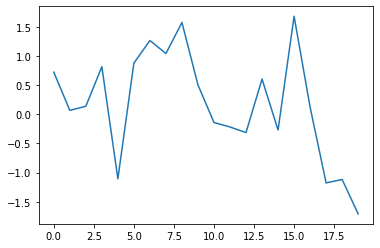

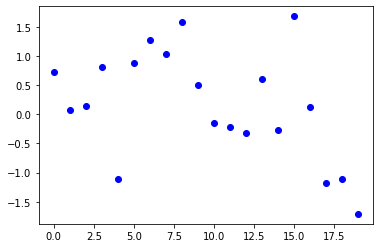

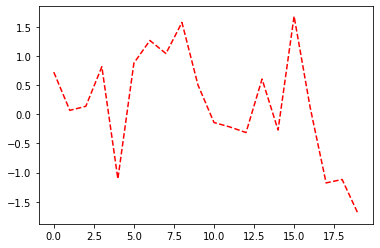

In [48]:
#ex) How to do visualization
x = range(20)
y = tf.random.normal([20], 0, 1)
plt.plot(x, y)
plt.show()

#ex) marking with the point
plt.plot(x, y, 'bo')
plt.show()

plt.plot(x, y, 'r--')
plt.show()

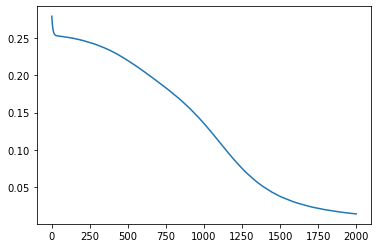

In [13]:
# plotting history that has learning error
plt.plot(history.history['loss'])
plt.show()